In [25]:

import matplotlib.pyplot as plt
import ollama

# Import all scripts
import pdf_to_md
import analyze_img
import analyze_per_llm
import chunk_md
import vectorize

In [3]:
gl_path = "001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.pdf"
if False: # run only once
    pdf_to_md.convert_pdf_to_markdown(gl_path)

2026-01-28 15:55:53,589 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-28 15:55:53,625 - INFO - Going to convert document batch...
2026-01-28 15:55:53,626 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e15257d5971d637213ae4eeac3fe7fb5
2026-01-28 15:55:53,641 - INFO - Loading plugin 'docling_defaults'
2026-01-28 15:55:53,642 - INFO - Registered picture descriptions: ['vlm', 'api']
2026-01-28 15:55:53,655 - INFO - Loading plugin 'docling_defaults'
2026-01-28 15:55:53,658 - INFO - Registered ocr engines: ['easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']


Converting: /Users/fabiantrost/Mimir/Students/guideline_student_project/snippets/001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.pdf
Output folder: /Users/fabiantrost/Mimir/Students/guideline_student_project/snippets/output_1


2026-01-28 15:55:53,951 - INFO - Accelerator device: 'mps'
2026-01-28 15:55:56,397 - INFO - Accelerator device: 'mps'
2026-01-28 15:55:57,929 - INFO - Accelerator device: 'mps'
2026-01-28 15:55:58,332 - INFO - Processing document 001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.pdf
2026-01-28 15:57:55,218 - INFO - Finished converting document 001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.pdf in 121.63 sec.


  Saved: img_1.png
  Saved: img_2.png
  Saved: img_3.png
  Saved: img_4.png
  Saved: img_5.png
  Saved: img_6.png
  Saved: img_7.png
  Saved: img_8.png
  Saved: img_9.png
  Saved: img_10.png
  Saved: img_11.png
  Saved: img_12.png
  Saved: img_13.png
  Saved: img_14.png
  Saved: img_15.png
  Saved: img_16.png
  Saved: img_17.png
  Saved: img_18.png
  Saved: img_19.png
  Saved: 001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.md
Conversion complete! 19 images extracted.


PosixPath('/Users/fabiantrost/Mimir/Students/guideline_student_project/snippets/output_1')

In [ ]:
# analyze image using granite vision
prompt = "Analyze the content of the image and provide a summary. If its a flowchart, describe all the steps involved." #improve prompt or play around with it
model = "granite3.2-vision:2b" # test different images

path = "output_1/img_10.png"
img_cont = analyze_img.analyze_image(image_path=path, prompt=prompt, model=model)

print(img_cont)

2026-01-28 15:59:46,641 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"



The image is a flowchart that outlines a medical treatment process for chronic kidney disease (CKD). The flowchart is divided into three main sections: "Eisenmangel" (Iron Deficiency), "Anämie der Renal" (Renal Anemia), and "Vit. B12 / Folsäuremangel" (Vitamin B12/Folate Deficiency). Each section has a corresponding color-coded background: blue for Eisenmangel, orange for Anämie der Renal, and green for Vit. B12 / Folsäuremangel.

The flowchart begins with the diagnosis of chronic kidney disease (CKD) and proceeds to determine if there is an iron deficiency. If iron deficiency is present, the treatment involves increasing iron intake through oral supplements or intravenous infusions. The next step is to assess for renal anemia, which is defined as a hemoglobin (Hb) level below 12 g/dL and a mean corpuscular volume (MCV) of less than 30 µg/L. If renal anemia is present, the treatment involves increasing iron supplementation or administering medications such as allopurinol to reduce hem

In [ ]:
#include image description into md file

✅ Chunked 001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.md
   → 151 chunks created
   → Saved to: /Users/fabiantrost/Mimir/Students/guideline_student_project/snippets/output_1/chunks.json


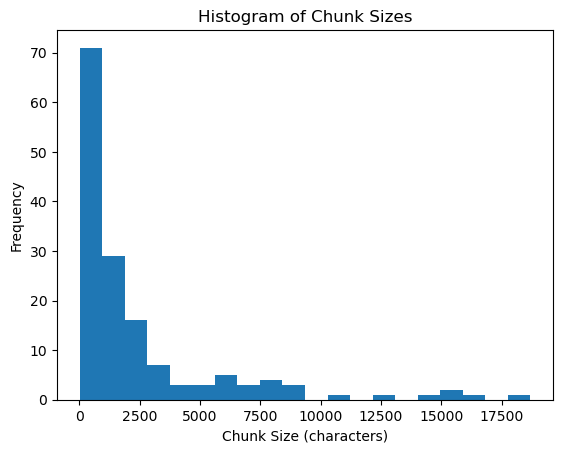

## Epidemiologie 8.1.

Grundlage für die Definition der Präoperativen Anämie dieser Leitlinie sind die von der WHO definierten Grenzwerte für Anämie auf Meereshöhe in Abhängigkeit von der Population (1):

-  Frauen (nicht schwanger): &lt; 12 g/dl
-  Frauen (schwanger): &lt; 11 g/dl
-  Männer: &lt; 13 g/dl

Der WHO-Klassifikation der Anämie folgt auch die in dieser Leitlinie analysierte Evidenz inkl. der internationalen Leitlinie des 'Network for the Advancement of Transfusion Alternatives (NATA)' und ihren Empfehlungen zur Diagnostik, Evaluation und Management der präoperativen Therapie nach GRADE (2).

Die durchschnittliche Prävalenz einer Anämie jeglicher Ursache liegt weltweit bei ca. 27 % (3), in Europa allgemein bei ca. 10 % (1) und variiert je nach Population: Bei Frauen wird in Deutschland von einer Anämieprävalenz von 5 - 19 % ausgegangen (1). Für Männer im Alter von 17 - 49 Jahren wird eine Prävalenz der Anämie jedweder Ursache von 1,5 % beschrieben (4). Jedoch steigt die P

In [22]:
# chunk text
chunks = chunk_md.chunk_markdown_file("output_1/001-024l_S3_Praeoperative-Anaemie_2018-04-abgelaufen.md", output_path="output_1/chunks.json", max_chunk_size=4096, overlap_percent=0.2) #function might need some debugging/improvements

#show histogram of chunk sizes

chunk_sizes = [len(chunk['text']) for chunk in chunks]
plt.hist(chunk_sizes, bins=20)
plt.title("Histogram of Chunk Sizes")
plt.xlabel("Chunk Size (characters)")
plt.ylabel("Frequency")
plt.show()

print(chunks[45]["text"])

In [24]:
#summarize guideline

#To create a high-quality RAG system, generating a Global Context Summary is a brilliant move. 
# #his "Top-Down" approach allows you to inject metadata into your individual vector chunks 
# #(e.g., "In the context of Acute Treatment for COPD..."), which significantly improves retrieval accuracy when queries are ambiguous

prompt="""Rolle: Du bist ein leitender medizinischer Redakteur mit Expertise in der Strukturierung von AWMF-Leitlinien.

Aufgabe: Analysiere die vorliegende medizinische Leitlinie und erstelle eine hochstrukturierte globale Zusammenfassung. Diese Zusammenfassung dient als "Context Injector" für ein RAG-System, um die Einordnung von Einzelabschnitten zu verbessern.

Struktur der Antwort:

    Metadaten: Titel der Leitlinie, Fachgesellschaft, Registernummer und Gültigkeitsbereich (z.B. ambulant/stationär).

    Patientenzielgruppe: Wer genau wird behandelt? (Einschluss-/Ausschlusskriterien).

    Haupthandlungsstrang: Eine kurze Beschreibung des empfohlenen Behandlungspfades (vom Screening zur Nachsorge).

    Zentrale Paradigmen: Welche grundlegenden Prinzipien ziehen sich durch die gesamte Leitlinie? (z.B. "Shared Decision Making", "Palliative Priorisierung").

    Abkürzungsverzeichnis: Eine Liste der wichtigsten im Dokument verwendeten medizinischen Akronyme und deren Auflösung.

Stilvorgabe: Extrem prägnant. Verwende medizinisches Fachvokabular. Vermeide Prosa; nutze Listen. HALTE DICH KURZ UND PRÄGNANT.

Dokumentinhalt:"""  #maybe change prompt and play around



#concat chunks into one text
full_text = "\n\n".join([chunk['text'] for chunk in chunks])

#truncate text to 30000 characters for analysis
text = full_text[:30000]

model = "ministral-3:8b" #play around with this, try different models (gpt-oss:20b, ministral-3:3b, llama-2:7b, etc ...)
global_summary = analyze_per_llm.analyze_text(text=text,
    prompt=prompt,
    model=model
) 
print(global_summary)

2026-01-28 16:12:02,970 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


### **S3-Leitlinie: Diagnostik und Therapie der präoperativen Anämie**
**Fachgesellschaft:** Deutsche Gesellschaft für Anästhesiologie und Intensivmedizin (DGAI) in Kooperation mit AWMF
**AWMF-Registernummer:** 001-0024
**Version:** 1.0 (Stand: 11.04.2018)
**Gültigkeitsbereich:** Ambulant/stationär (präoperative Patienten)

---

### **Metadaten**
- **Titel:** *Diagnostik und Therapie der präoperativen Anämie*
- **Fachgesellschaft:** DGAI (federführend), AWMF
- **Evidenzgraduierung:** GRADE-System
- **Zielgruppe:** Anästhesiologen, Chirurgen, Internisten, Hämatologen

---

### **Patientenzielgruppe**
**Einschlusskriterien:**
- Alle elektive/akut operierende Patienten mit **Hämoglobin (Hb) < 12 g/dl (Frauen) / < 13 g/dl (Männer)** oder klinischen Anämiezeichen (z. B. Fatigue, Tachykardie).
- **Risikostratifizierung** nach OP-Typ:
  - Kardiochirurgie (höchste Priorität)
  - Elektive Nicht-Kardio-OP (mittlere Priorität)
  - Subgruppen: Geschlecht, Alter, Komorbiditäten (z. B. Niereninsuffi

In [26]:
# use global summary together with content of single chunk (here chunk[45] as example and write a summary meant for vectorization)

chunk_index = 45
chunk_content = chunks[chunk_index]['text']

# Create a prompt that combines global context with chunk content
contextualized_prompt = f"""Rolle: Du bist ein medizinischer Dokumentationsexperte.

Aufgabe: Erstelle eine kontextualisierte Zusammenfassung dieses Abschnitts für ein Vektordatenbank-System.

Globaler Kontext der Leitlinie:
{global_summary}

Abschnittsinhalt:
{chunk_content}

Anweisung: Schreibe eine prägnante Zusammenfassung (2-4 Sätze), die:
1. Den Abschnittsinhalt im Kontext der Gesamtleitlinie einordnet
2. Die wichtigsten Informationen hervorhebt
3. Medizinisch präzise ist
4. Für semantische Suche optimiert ist"""

# Generate contextualized summary using direct ollama call
model = "ministral-3:8b"
response = ollama.chat(
    model=model,
    messages=[
        {
            'role': 'user',
            'content': contextualized_prompt
        }
    ]
)
contextualized_summary = response['message']['content']

print(f"Chunk {chunk_index} Contextualized Summary:")
print("="*80)
print(contextualized_summary)
print("\n" + "="*80)
print(f"\nOriginal chunk preview (first 200 chars):")
print(chunk_content[:200] + "...")

2026-01-28 16:14:22,954 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Chunk 45 Contextualized Summary:
**Zusammenfassung für Vektordatenbank (semantisch optimiert):**

Die **Epidemiologie der präoperativen Anämie** (Abschnitt 8.1) stützt sich auf **WHO-Grenzwerte** (Hb < 12 g/dl bei Frauen, < 13 g/dl bei Männern) und zeigt eine **globale Prävalenz von 27 %**, in Europa bei **~10 %**, mit **geschlechtsspezifischen Unterschieden** (Frauen: 5–19 %, Männer 17–49 J.: 1,5 %) und **alterabhängiger Zunahme** (> 65 J.: 11 %, ≥ 85 J.: 26,1 %). **Präoperative Patienten** weisen eine **erhöhte Inzidenz von 10,5–47,9 %** auf, besonders bei **kardiochirurgischen, orthopädischen, gynäkologischen und vaskulären Eingriffen** – ein **kritischer Risikofaktor** für perioperative Komplikationen (vgl. Leitlinien-Ziel: Vermeidung kardialer/infektiologischer Ereignisse). Die Daten korrelieren mit der **NATA-Leitlinie** und unterstreichen die **Notwendigkeit einer frühzeitigen Diagnostik** (Hb-Bestimmung + ätiologische Abklärung) zur **Therapieoptimierung** (z. B. Eisenrepletion

In [30]:
#vectorize contextualized_summary and show vector as np.array
vector = vectorize.vectorize(contextualized_summary, model = "granite-embedding:278m") #test different embedding models
print("Vectorized Contextualized Summary:")
print(f"Vector shape: {vector.shape}")
print(f"First 10 dimensions: {vector[:10]}")

2026-01-28 16:16:44,610 - INFO - HTTP Request: POST http://127.0.0.1:11434/api/embed "HTTP/1.1 200 OK"


Vectorized Contextualized Summary:
Vector shape: (768,)
First 10 dimensions: [-0.0626595   0.03329423 -0.07802938  0.01028506  0.05992523 -0.00897435
  0.03463752  0.03080464  0.04091489  0.03770637]


In [ ]:
# try retrival via vector distance (cosine similarity, geometric etc.)